In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


In [ ]:
prof

## Correlation:

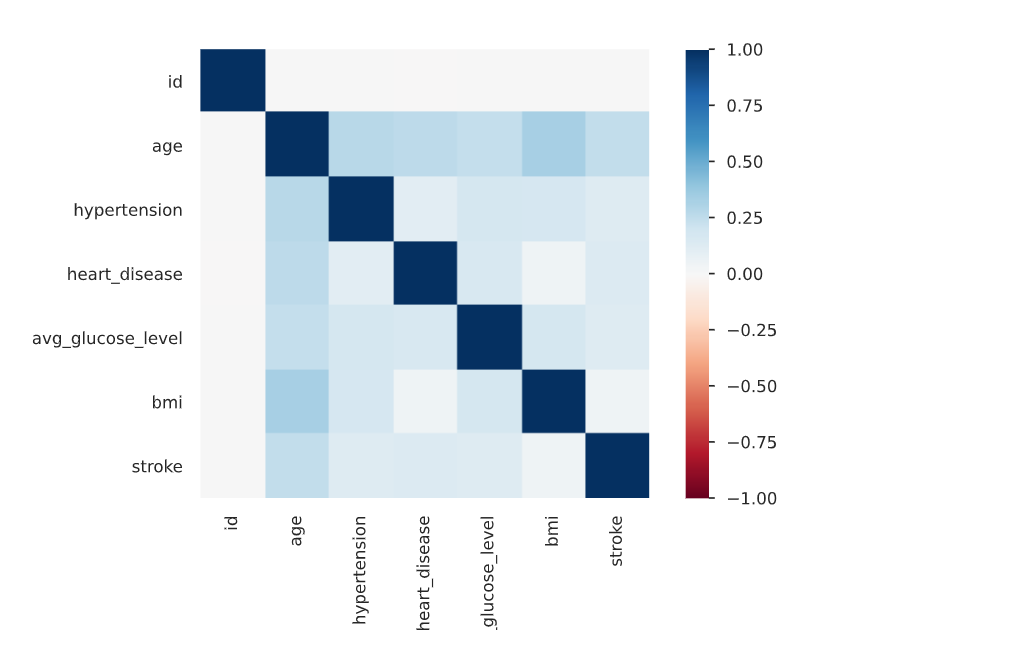

In [ ]:
cols = df.columns
cols = list(cols)
cols

In [ ]:
y = df['stroke']
X = df[set(cols)-set(['id', 'stroke'])]
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

flow = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(),
    RandomForestClassifier(n_jobs=4, verbose=True, n_estimators=200, max_depth=10)
    )

flow.fit(X_train, y_train)
flow.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC
for ker in ['rbf', 'poly', 'sigmoid']:
    flow_svm = make_pipeline(
        OneHotEncoder(handle_unknown='ignore'),
        SimpleImputer(),
        SVC(verbose=True, kernel=ker)
        )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=500)
    flow.fit(X_train, y_train)
    print(f'For kernel:{ker} score: {flow.score(X_test, y_test)}')